In [1]:
#dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

#import OpenWeather API key
from api_keys import weather_api_key

#import citipy to determine the cities based on latitude and longitude
from citipy import citipy

In [2]:
#empty list for holding latitude and latitude coordinates
lat_lngs = []

#empty list for holding cities
cities = []

#range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

#create random latitude and longitude combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

#identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    #if the city is unique, then add it to cities list
    if city not in cities:
        cities.append(city)

#print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 600


## Plots to Showcase the Relationship Between Weather Variables and Latitude

In [3]:
#set the API base URL
url ="https://api.openweathermap.org/data/2.5/weather?"
units = "metric"
query_url = f"{url}appid={weather_api_key}&units={units}&q="

#define an empty list to fetch the weather data for each city
city_data = []

#print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

#create counters
record_count = 1
set_count = 1

#loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    #group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    #create endpoint URL with each city
    city_url = query_url + city
    
    #log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    #add 1 to the record count
    record_count += 1

    #run an API request for each of the cities
    try:
        #parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
    

        #parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        #append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    #if an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
#indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")   

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | kapaa
Processing Record 2 of Set 1 | yellowknife
Processing Record 3 of Set 1 | tual
Processing Record 4 of Set 1 | bathsheba
Processing Record 5 of Set 1 | puerto ayora
Processing Record 6 of Set 1 | mataura
Processing Record 7 of Set 1 | souillac
Processing Record 8 of Set 1 | bluff
Processing Record 9 of Set 1 | new norfolk
Processing Record 10 of Set 1 | barrow
Processing Record 11 of Set 1 | cape town
Processing Record 12 of Set 1 | ondorhaan
City not found. Skipping...
Processing Record 13 of Set 1 | longyearbyen
Processing Record 14 of Set 1 | busselton
Processing Record 15 of Set 1 | ludvika
Processing Record 16 of Set 1 | yeppoon
Processing Record 17 of Set 1 | jilib
Processing Record 18 of Set 1 | kiama
Processing Record 19 of Set 1 | zeya
Processing Record 20 of Set 1 | kodiak
Processing Record 21 of Set 1 | ushuaia
Processing Record 22 of Set 1 | rikitea
Processing Record 23 of Set 1 

City not found. Skipping...
Processing Record 34 of Set 4 | santa isabel do rio negro
Processing Record 35 of Set 4 | hilsa
Processing Record 36 of Set 4 | jumla
Processing Record 37 of Set 4 | east london
Processing Record 38 of Set 4 | armacao dos buzios
City not found. Skipping...
Processing Record 39 of Set 4 | mitu
Processing Record 40 of Set 4 | san quintin
Processing Record 41 of Set 4 | fortuna
Processing Record 42 of Set 4 | ribeira grande
Processing Record 43 of Set 4 | batagay-alyta
Processing Record 44 of Set 4 | bubaque
Processing Record 45 of Set 4 | abalak
Processing Record 46 of Set 4 | leningradskiy
Processing Record 47 of Set 4 | pangnirtung
Processing Record 48 of Set 4 | jacareacanga
Processing Record 49 of Set 4 | yabrud
Processing Record 0 of Set 5 | andrelandia
Processing Record 1 of Set 5 | viedma
Processing Record 2 of Set 5 | inhambane
Processing Record 3 of Set 5 | la ronge
Processing Record 4 of Set 5 | chagda
City not found. Skipping...
Processing Record 5 

Processing Record 24 of Set 8 | kropotkin
Processing Record 25 of Set 8 | saint-francois
Processing Record 26 of Set 8 | buenos aires
Processing Record 27 of Set 8 | lorena
Processing Record 28 of Set 8 | lagoa
Processing Record 29 of Set 8 | mitsamiouli
Processing Record 30 of Set 8 | malpe
Processing Record 31 of Set 8 | santa maria
Processing Record 32 of Set 8 | kavieng
Processing Record 33 of Set 8 | coihaique
Processing Record 34 of Set 8 | chor
Processing Record 35 of Set 8 | sidi ali
Processing Record 36 of Set 8 | conceicao do araguaia
Processing Record 37 of Set 8 | srednekolymsk
Processing Record 38 of Set 8 | beringovskiy
Processing Record 39 of Set 8 | manzhouli
Processing Record 40 of Set 8 | kieta
Processing Record 41 of Set 8 | la asuncion
Processing Record 42 of Set 8 | shirokiy
Processing Record 43 of Set 8 | kazalinsk
City not found. Skipping...
Processing Record 44 of Set 8 | chokurdakh
Processing Record 45 of Set 8 | marathon
Processing Record 46 of Set 8 | nedryha

Processing Record 12 of Set 12 | mangan
Processing Record 13 of Set 12 | varhaug
Processing Record 14 of Set 12 | ambilobe
Processing Record 15 of Set 12 | dharchula
Processing Record 16 of Set 12 | buchanan
Processing Record 17 of Set 12 | tidore
City not found. Skipping...
Processing Record 18 of Set 12 | prince rupert
Processing Record 19 of Set 12 | casablanca
Processing Record 20 of Set 12 | caravelas
Processing Record 21 of Set 12 | zyryanka
Processing Record 22 of Set 12 | batticaloa
Processing Record 23 of Set 12 | walvis bay
Processing Record 24 of Set 12 | acapulco
Processing Record 25 of Set 12 | mahadday weyne
City not found. Skipping...
Processing Record 26 of Set 12 | grindavik
Processing Record 27 of Set 12 | port angeles
Processing Record 28 of Set 12 | basco
Processing Record 29 of Set 12 | wembley
Processing Record 30 of Set 12 | sapouy
Processing Record 31 of Set 12 | mangit
Processing Record 32 of Set 12 | la palma
Processing Record 33 of Set 12 | constitucion
Proce

In [4]:
#convert cities weather data into Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
#show record count
city_data_df.count()

City          553
Lat           553
Lng           553
Max Temp      553
Humidity      553
Cloudiness    553
Wind Speed    553
Country       553
Date          553
dtype: int64

In [5]:
#display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,kapaa,22.0752,-159.3190,22.49,93,75,4.12,US,1675194948
1,yellowknife,62.4560,-114.3525,-31.71,75,75,3.60,CA,1675194841
2,tual,-5.6667,132.7500,28.54,72,86,5.54,ID,1675195296
3,bathsheba,13.2167,-59.5167,27.34,65,40,7.20,BB,1675195313
4,puerto ayora,-0.7393,-90.3518,28.98,86,65,1.79,EC,1675195314


In [6]:
#export city data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
#read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

#display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,kapaa,22.0752,-159.3190,22.49,93,75,4.12,US,1675194948
1,yellowknife,62.4560,-114.3525,-31.71,75,75,3.60,CA,1675194841
2,tual,-5.6667,132.7500,28.54,72,86,5.54,ID,1675195296
3,bathsheba,13.2167,-59.5167,27.34,65,40,7.20,BB,1675195313
4,puerto ayora,-0.7393,-90.3518,28.98,86,65,1.79,EC,1675195314


## Latitude vs. Temperature Plots

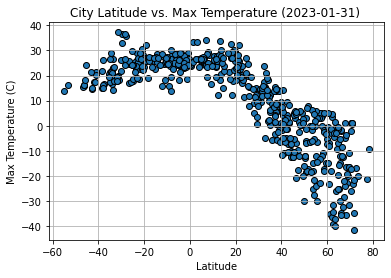

In [8]:
#build scatter plot
x_values = city_data_df["Lat"]
y_values = city_data_df["Max Temp"]
plt.scatter(x_values, y_values, linewidth=1, marker="o", edgecolors="black")
plt.title(f"City Latitude vs. Max Temperature (%s) " % time.strftime("%Y-%m-%d"))
plt.ylabel("Max Temperature (C)")
plt.xlabel("Latitude")

#incorporate other graph properties
plt.grid()
plt.savefig("output_data/Fig1.png")
plt.show()



## Latitude vs. Humidity

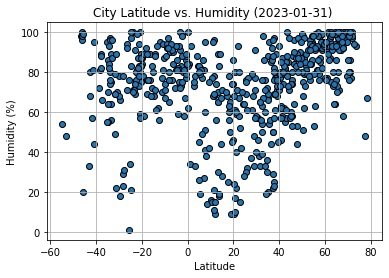

In [9]:
#build scatter plot
y_values = city_data_df["Humidity"]
plt.scatter(x_values, y_values, linewidth=1, marker="o", edgecolors="black")
plt.title(f"City Latitude vs. Humidity (%s) " % time.strftime("%Y-%m-%d"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")

#incorporate other graph properties
plt.grid()
plt.savefig("output_data/Fig2.png")
plt.show()

## Latitude vs. Cloudiness

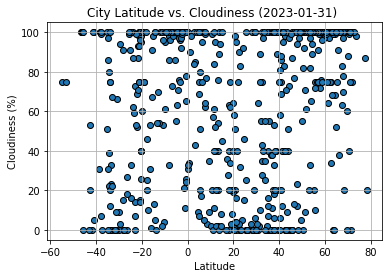

In [10]:
#build scatter plot
y_values = city_data_df["Cloudiness"]
plt.scatter(x_values, y_values, linewidth=1, marker="o", edgecolors="black")
plt.title(f"City Latitude vs. Cloudiness (%s) " % time.strftime("%Y-%m-%d"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")

#incorporate other graph properties
plt.grid()
plt.savefig("output_data/Fig3.png")
plt.show()

## Latitude vs. Wind Speed

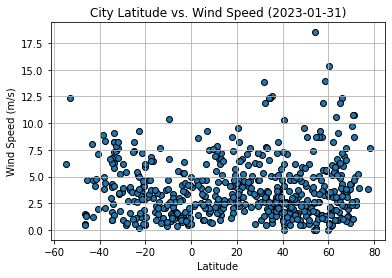

In [11]:
#build scatter plot
y_values = city_data_df["Wind Speed"]
plt.scatter(x_values, y_values, linewidth=1, marker="o", edgecolors="black")
plt.title(f"City Latitude vs. Wind Speed (%s)" % time.strftime("%Y-%m-%d"))
plt.ylabel("Wind Speed (m/s)")

plt.xlabel("Latitude")
#incorporate other graph properties
plt.grid()
plt.savefig("output_data/Fig4.png")
plt.show()

## Linear Regression for Each Relationship

In [12]:
#define a function to create Linear Regression plots
def regression_plots(x_values,y_values,title, y_label, line_coordinates):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,line_coordinates,fontsize=15,color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    print(f"The r-value is: {rvalue}")
    plt.show()


In [13]:
#create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,kapaa,22.0752,-159.3190,22.49,93,75,4.12,US,1675194948
1,yellowknife,62.4560,-114.3525,-31.71,75,75,3.60,CA,1675194841
3,bathsheba,13.2167,-59.5167,27.34,65,40,7.20,BB,1675195313
9,barrow,71.2906,-156.7887,-22.99,77,0,10.80,US,1675194962
11,longyearbyen,78.2186,15.6401,-9.09,67,20,7.72,SJ,1675195318


In [14]:
#create a DataFrame with the Southern Hemisphere data (Latitude > 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,tual,-5.6667,132.7500,28.54,72,86,5.54,ID,1675195296
4,puerto ayora,-0.7393,-90.3518,28.98,86,65,1.79,EC,1675195314
5,mataura,-46.1927,168.8643,15.72,100,100,0.51,NZ,1675194966
6,souillac,-20.5167,57.5167,26.21,89,40,3.09,MU,1675195316
7,bluff,-46.6000,168.3333,15.46,98,100,1.45,NZ,1675195022


## Temperature vs. Latitude Linear Regression Plot (Northern & Southern Hemisphere)

The r-value is: -0.8533678396138696


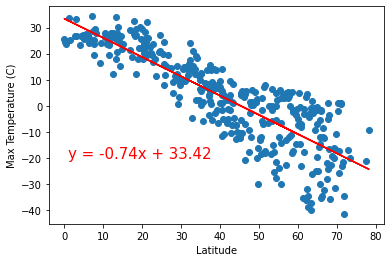

In [15]:
#linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
regression_plots(x_values,y_values,"Northern Hemisphere: Temperature vs. Latitude Linear Regression", 
                 "Max Temperature (C)", (1,-20))

The r-value is: 0.4261110650190511


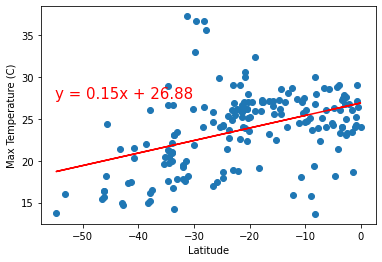

In [16]:
#linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
regression_plots(x_values,y_values,"Southern Hemisphere: Temperature vs. Latitude Linear Regression", 
                 "Max Temperature (C)", (-55, 27.5))

### Insights: Temperature vs. Latitude
- The linear plots show that there is correlation between temperature and distance to the equator. In both hemispheres, the farther a city is from the equator, the colder the temperature is. City temperatures increase as they approach the equator.

## Humidity vs. Latitude Linear Regression Plot (Northern & Southern Hemisphere)

The r-value is: 0.5376927676475122


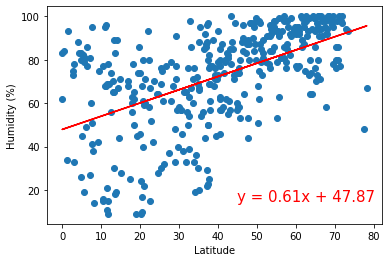

In [17]:
#northern hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
regression_plots(x_values,y_values,"Northern Hemisphere: Humidity vs. Latitude Linear Regression", 
                 "Humidity (%)", (45,15))

The r-value is: 0.2224803465515449


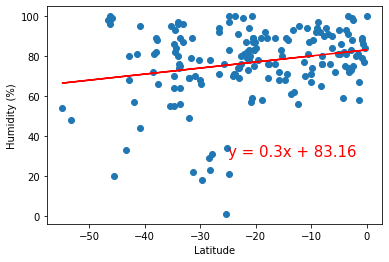

In [18]:
#southern hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
regression_plots(x_values,y_values,"Southern Hemisphere: Humidity vs. Latitude Linear Regression", 
                 "Humidity (%)", (-25, 30))

### Insights: Humidity vs. Latitude
- There is a positve, although weak, correlation between humidity and latitude. Cities of higher altitudes/above the equator are more humid. 

## Cloudiness vs . Latitude Linear Regression Plot (Northern & Southern Hemisphere)

The r-value is: 0.3739012606017639


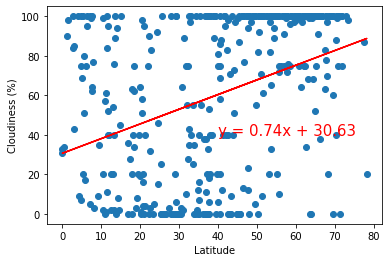

In [19]:
#northern hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
regression_plots(x_values,y_values,"Northern Hemisphere: Cloudiness vs. Latitude Linear Regression", 
                 "Cloudiness (%)", (40,40))

The r-value is: 0.29848153461052357


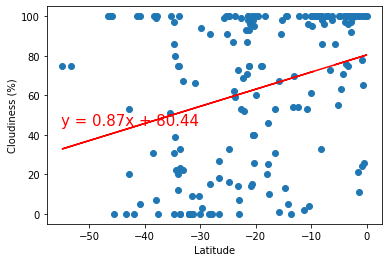

In [20]:
#southern hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
regression_plots(x_values,y_values,"Southern Hemisphere: Cloudiness vs. Latitude Linear Regression", 
                 "Cloudiness (%)", (-55, 45))

### Insights: Cloudiness vs. Latitude
- There is no correlation between cloudiness and latitude. Cities vary on cloudiness percentage no matter their location. 

## Wind Speed vs. Latitude Linear Regression Plot (Northern & Southern Hemisphere)

The r-value is: 0.038810330404475464


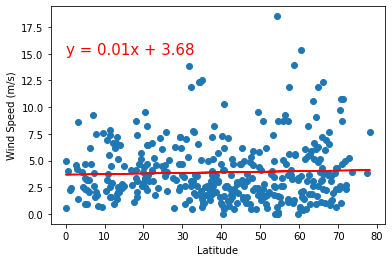

In [21]:
#northern hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
regression_plots(x_values,y_values,"Northern Hemisphere: Wind Speed vs. Latitude Linear Regression", 
                 "Wind Speed (m/s)", (0,15))

The r-value is: -0.3326351399066443


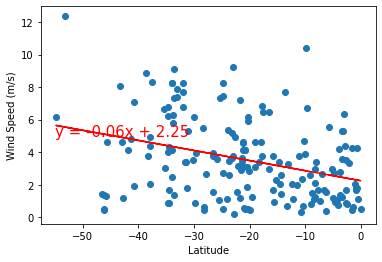

In [22]:
#southern hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
regression_plots(x_values,y_values,"Southern Hemisphere: Wind Speed vs. Latitude Linear Regression", 
                 "Wind Speed (m/s)", (-55, 5))

### Insights: Wind Speed vs. Latitude
- In the southern hemisphere, the wind speed slows down as citites approach the equator. Although, there is no pattern of wind speed and latitude in the northern hemisphere. Overall, there is little to no correlation between wind speeds and latitude.